In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [3]:
df= pd.read_csv('Dataset/creditcard.csv',sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().values.any()

False

Text(0, 0.5, 'frequency')

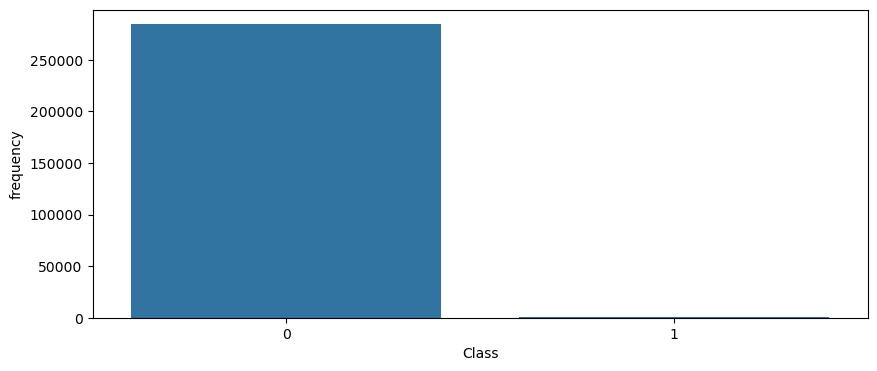

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Class')
plt.ylabel("frequency")


In [30]:
#here 0 is normal & 1 is fraud

In [36]:
fraud = df[df["Class"]==1]
normal = df[df["Class"]==0]


In [38]:
#Here the only two things that looks usable are time and amount so lets first see amount

In [58]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [60]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [62]:
fraud.Time.describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [64]:
normal.Time.describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

In [66]:
#only amount is usable for seeing how are they faring

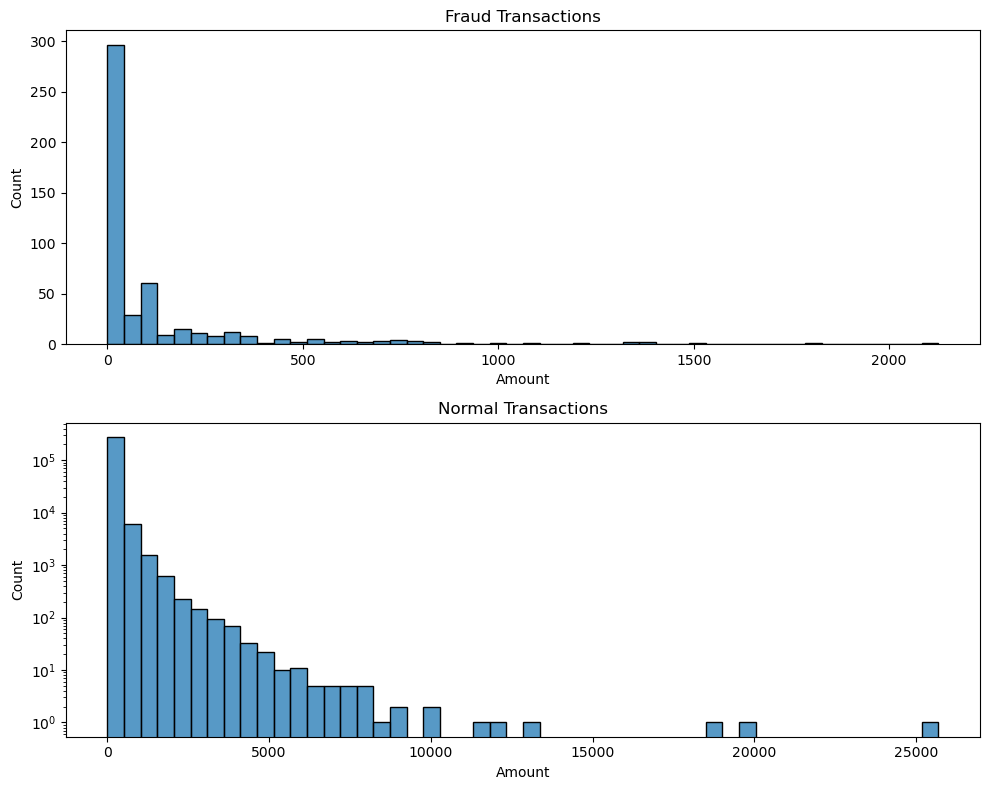

In [110]:

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# First subplot (fraud data)
axes[0].set_yscale('linear')
sns.histplot(data=fraud, x="Amount", bins=50, ax=axes[0])
axes[0].set_title('Fraud Transactions')

# Second subplot (normal data) 
axes[1].set_yscale('log')
sns.histplot(data=normal, x="Amount", bins=50, ax=axes[1])
axes[1].set_title('Normal Transactions')

plt.tight_layout()
plt.show()

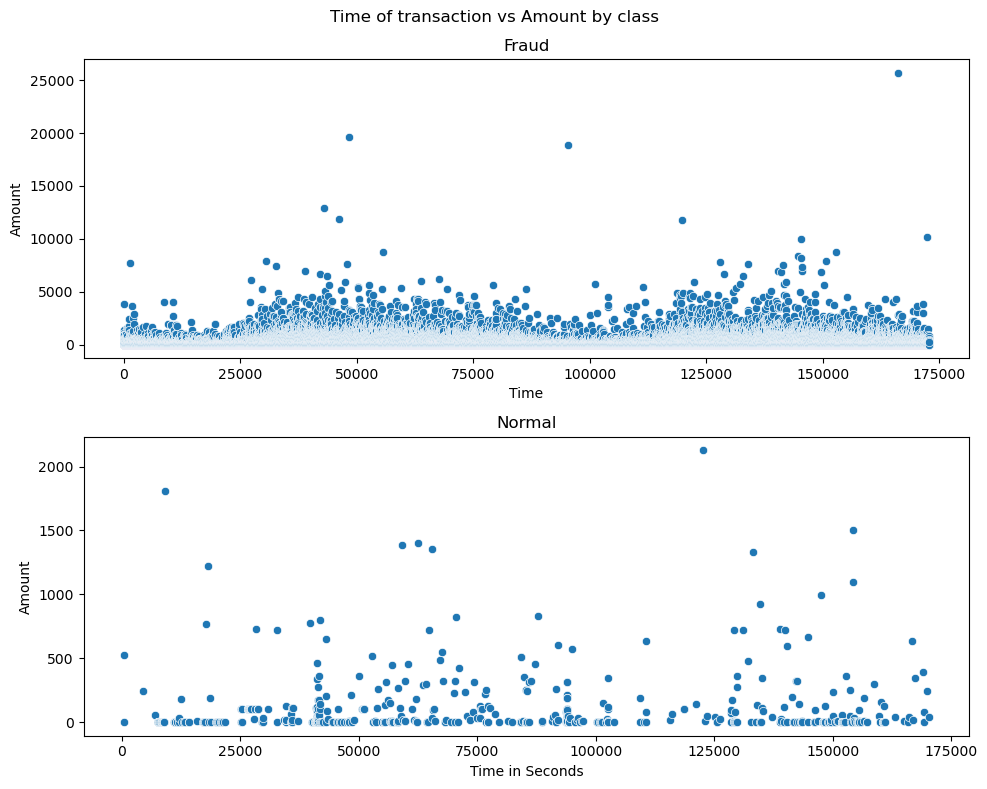

In [127]:

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plt.suptitle('Time of transaction vs Amount by class')
# First subplot (fraud data)
axes[0].set_yscale('linear')
plt.xlabel("Time in Seconds")
sns.scatterplot(data = normal,x='Time',y="Amount",ax=axes[0])
axes[0].set_title('Fraud')

# Second subplot (normal data) 
axes[1].set_yscale('linear')
plt.xlabel("Time in Seconds")
sns.scatterplot(data = fraud,x='Time',y="Amount",ax=axes[1])
axes[1].set_title('Normal')

plt.tight_layout()
plt.show()

In [129]:
#so we cant use full data but will use some sample

In [135]:
data_sample = df.sample(frac=0.1,random_state=90)
data_sample.shape

(28481, 31)

In [137]:
Fraud = data_sample[data_sample['Class']==1]

Valid = data_sample[data_sample['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [143]:
print(outlier_fraction)
print("f: Fraud Cases :{}".format(len(Fraud)))
print("f: Fraud Cases :{}".format(len(Valid)))

0.001265600281244507
f: Fraud Cases :36
f: Fraud Cases :28445


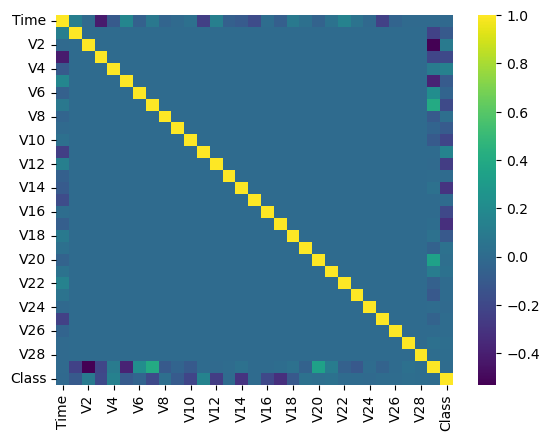

In [159]:
corrmat = data_sample.corr()
top_features = corrmat.index

heatmap= sns.heatmap(df[top_features].corr(),cmap='viridis')

In [191]:
columns = data_sample.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
state = np.random.RandomState(101)
X = data_sample[columns]
y = data_sample[target]
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [262]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    n_errors = (preds != y_test).sum()
    print("{}: {}".format(model,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_test,preds))
    print("Classification Report :")
    print(classification_report(y_test,preds))

In [272]:
from sklearn.ensemble import RandomForestClassifier,IsolationForest

In [292]:
model = RandomForestClassifier(n_estimators=10,max_features="sqrt",random_state=101)



In [298]:
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.03244997770416881
RandomForestClassifier(n_estimators=10, random_state=101): 3
Accuracy Score :
0.9989469989469989
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2843
           1       1.00      0.50      0.67         6

    accuracy                           1.00      2849
   macro avg       1.00      0.75      0.83      2849
weighted avg       1.00      1.00      1.00      2849



In [300]:
model=IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0)

In [304]:
model.fit(X)
scores_prediction = model.decision_function(X)
y_pred = model.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
   
print("{}: {}".format(clf_name,n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))